# Machine Learning
Yorick Juffer - s1993623 \
Leon Koole - s4436563 \
... \
Alejandro Sánchez Roncero - s5279402

## Libraries

In [124]:
import numpy as np
import matplotlib.pyplot as pl
import tensorflow.keras as keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

# Loading data
This dataset contains 2000 grayscale images of handwritten digits, 200 from each class. The images are 15 × 16 
sized, making for n = 240 dimensional image vectors. The data are in the attached text file mfeat-pix.txt, 
one vector per row, sorted such that the first 200 rows are "0" digit examples, the next 200 are "1" digit examples 
etc. The grayscale encoding in mfeat-pix.txt is done by integer steps from 0 (white) to 6 (black). 

In [135]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
  for j in range(200):
    labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
  features[i] = np.array(features[i].split()).astype('float').reshape(16, 15)
  # Normalize
  features[i] = features[i] / 6
features = np.array(features)


# Plot stuff

6


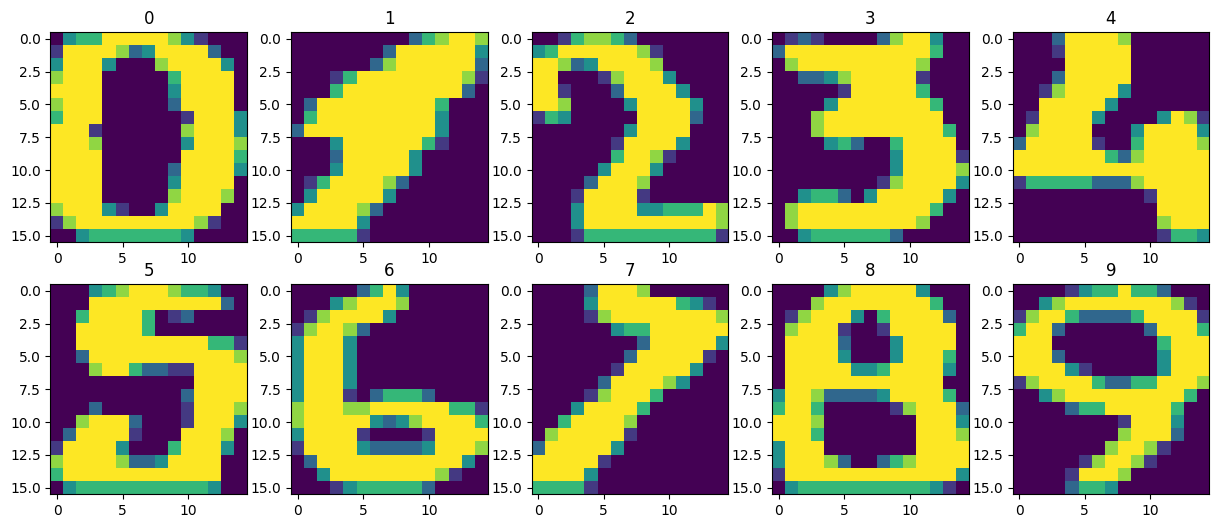

In [136]:
print(labels[1200])

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(features[(5*i+j)*200], cmap='viridis', interpolation='nearest')
    axs[i, j].set_title(labels[(5*i+j)*200])


## Split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

# CNN Model
## Model

In [138]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 15, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 13, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1344)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               172160    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

## Compile and train

In [140]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 2s 9ms/step - loss: 1.4325 - accuracy: 0.5644 - val_loss: 0.5311 - val_accuracy: 0.9050
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.8481 - val_loss: 0.2807 - val_accuracy: 0.9325
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3779 - accuracy: 0.8944 - val_loss: 0.2008 - val_accuracy: 0.9475
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.9281 - val_loss: 0.1596 - val_accuracy: 0.9550
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.2351 - accuracy: 0.9431 - val_loss: 0.1448 - val_accuracy: 0.9650
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9413 - val_loss: 0.1347 - val_accuracy: 0.9625
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.9588 - val_loss: 0.1291 - val_accuracy: 0.9625
Epoch 8/10
50/50 [=============

# NEW IDEAS
- data augmentation
- automatic features extraction (non-linear extraction) + linear regression
- ensemble of classifiers -> reference papers
- include operations